In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.font_manager as fm
from matplotlib import rc
import os

def set_font(font_file='malgun.ttf'): # 한글 출력
    font_dir = 'c:/Windows/Fonts/'
    font_name = fm.FontProperties(fname=os.path.join(font_dir, font_file)).get_name()
    rc('font', family=font_name)
set_font()

In [3]:
oecd_bli = pd.read_csv('oecd_bli_2015.csv',thousands=',')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv',thousands=',',delimiter='\t',encoding='latin1')

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

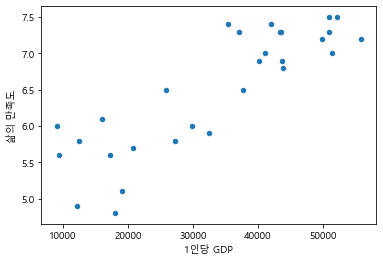

In [5]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
ax = country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
ax.set(xlabel="1인당 GDP", ylabel="삶의 만족도")
plt.show()

In [6]:
model = LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new))

[[5.96242338]]
